Acquire (`acquire.py`)

# Zillow

For the following, iterate through the steps you would take to create functions: 
- Write the code to do the following in a jupyter notebook,
- test it, 
- convert to functions, 
- then create the file to house those functions.

You will have a `zillow.ipynb` file and a *helper file* **for each section** in the pipeline.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#functions
import acquire as acq
import wrangle_zillow as wz



warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### acquire & summarize

#### 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`.
- Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = acq.zillow17()

In [4]:
df = df.set_index("parcelid")

In [5]:
df.head()

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,buildingclasstypeid,buildingclassdesc,heatingorsystemtypeid,heatingorsystemdesc,propertylandusetypeid,propertylandusedesc,storytypeid,storydesc,typeconstructiontypeid,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,1087254,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,NaN,None,2.0,Central,261,Single Family Residential,NaN,None,NaN,None
10711877,1072280,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,None,2.0,Central,261,Single Family Residential,NaN,None,NaN,None
10711888,1340933,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,None,2.0,Central,261,Single Family Residential,NaN,None,NaN,None
10711910,1878109,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,NaN,None,2.0,Central,261,Single Family Residential,NaN,None,NaN,None
10711923,2190858,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,None,2.0,Central,261,Single Family Residential,NaN,None,NaN,None


In [6]:
df.to_csv(r'~/Codeup/codeup-data-science/clustering-exercises/zillow17.csv')

In [2]:
df = pd.read_csv('zillow17.csv')

In [3]:
df.head(2)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid.1,buildingclassdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc
0,10711855,1087254,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
1,10711877,1072280,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN


In [3]:
df = df.set_index("parcelid")

In [4]:
df.head(2)

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,buildingclasstypeid.1,buildingclassdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,1087254,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
10711877,1072280,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN


#### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 10711855 to 167689317
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   airconditioningtypeid         24953 non-null  float64
 2   architecturalstyletypeid      206 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77380 non-null  float64
 5   bedroomcnt                    77380 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49671 non-null  float64
 8   calculatedbathnbr             76771 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6023 non-null   float64
 11  calculatedfinishedsquarefeet  77184 non-null  float64
 12  finishedsquarefeet12          73748 non-null  flo

In [39]:
df.shape

(77380, 74)

In [45]:
df.isnull().sum()

id                              0
airconditioningtypeid       52427
architecturalstyletypeid    77174
basementsqft                77330
bathroomcnt                     0
                            ...  
propertylandusedesc             0
storytypeid.1               77330
storydesc                   77330
typeconstructiontypeid.1    77158
typeconstructiondesc        77158
Length: 74, dtype: int64

In [ ]:
sns.pairplot(df, kind= "reg")

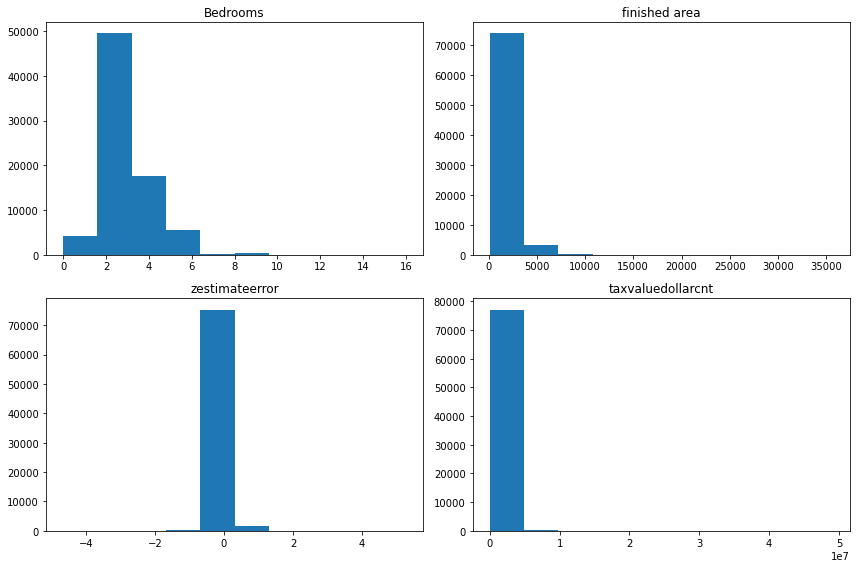

In [5]:
# plot some distributions 

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.bedroomcnt)
plt.title('Bedrooms')



plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet)
plt.title('finished area')



plt.subplot(223)
plt.hist(df.zestimateerror)
plt.title('zestimateerror')



plt.subplot(224)
plt.hist(df.taxvaluedollarcnt)
plt.title('taxvaluedollarcnt')

plt.tight_layout();


#### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, 
- the first column is the number of rows with missing values for that attribute 
- second column is percent of total rows that have missing values for that attribute. 

Run the function and document takeaways from this on how you want to handle missing values.

In [17]:
# % values missing in each column
percent = pd.DataFrame(df.isnull().sum()/len(df)*100)
percent

,0
id,0.000000
airconditioningtypeid,67.752649
architecturalstyletypeid,99.733781
basementsqft,99.935384
bathroomcnt,0.000000
...,...
propertylandusedesc,0.000000
storytypeid.1,99.935384
storydesc,99.935384
typeconstructiontypeid.1,99.713104


#### Test function


In [5]:
missingvals = acq.missing_values(df)

In [6]:
missingvals

,No.MissingValues,PercentMissing
id,0,0.000000
airconditioningtypeid,52427,67.752649
architecturalstyletypeid,77174,99.733781
basementsqft,77330,99.935384
bathroomcnt,0,0.000000
...,...,...
propertylandusedesc,0,0.000000
storytypeid.1,77330,99.935384
storydesc,77330,99.935384
typeconstructiontypeid.1,77158,99.713104


In [34]:
percent[percent[0] > 50]

,0
airconditioningtypeid,67.752649
architecturalstyletypeid,99.733781
basementsqft,99.935384
buildingclasstypeid,99.980615
decktypeid,99.206513
finishedfloor1squarefeet,92.216335
finishedsquarefeet13,99.947015
finishedsquarefeet15,96.111398
finishedsquarefeet50,92.216335
finishedsquarefeet6,99.501163


These all have such high percentages of missing values that I don't feel I'll gain much information.

In [30]:
# Drop columns or rows using dropna() based on a threshold
len(df.index)*0.5

38690.0

In [36]:
# Drop rows using dropna() based on a threshold
# threshold: Require that many non-NA values to survive. 

df.dropna(axis = 1, thresh = 0.5 * len(df.index))

,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,zestimateerror,transactiondate,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,1087254,2.0,3.0,8.0,2.0,2107.0,2107.0,6037.0,2.0,2.0,...,2016.0,374484.0,7659.36,6.037113e+13,-0.007357,2017-07-07,2.0,Central,261,Single Family Residential
10711877,1072280,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,2.0,2.0,...,2016.0,407000.0,8123.91,6.037113e+13,0.021066,2017-08-29,2.0,Central,261,Single Family Residential
10711888,1340933,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,2.0,2.0,...,2016.0,285332.0,6673.24,6.037113e+13,0.077174,2017-04-04,2.0,Central,261,Single Family Residential
10711910,1878109,2.0,3.0,8.0,2.0,1477.0,1477.0,6037.0,2.0,2.0,...,2016.0,20063.0,1116.46,6.037113e+13,-0.041238,2017-03-17,2.0,Central,261,Single Family Residential
10711923,2190858,2.0,4.0,8.0,2.0,1918.0,1918.0,6037.0,2.0,2.0,...,2016.0,247590.0,5239.85,6.037113e+13,-0.009496,2017-03-24,2.0,Central,261,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167686999,775695,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,2016.0,26405.0,988.48,NaN,-0.068632,2017-02-28,NaN,NaN,261,Single Family Residential
167687739,2863262,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,2016.0,988597.0,77045.13,NaN,0.360020,2017-03-03,NaN,NaN,266,Condominium
167687839,1372384,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,2016.0,1842678.0,22045.81,NaN,0.038797,2017-05-31,NaN,NaN,261,Single Family Residential


In [37]:
df.shape

(77380, 74)

Going from 74 features down to 35 seems a bit discouraging, although the features don't seem **too** important. 

I would rather drop the columns as opposed to rows.

In [38]:
# Drop rows using dropna() based on a threshold
# threshold: only drop when # of nulls in a row is 
# above the threshold value

df.dropna(axis = 0, thresh = 0.5 * len(df.columns))

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,buildingclasstypeid.1,buildingclassdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,1087254,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
10711877,1072280,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
10711888,1340933,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
10711910,1878109,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
10711923,2190858,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,NaN,2.0,Central,261,Single Family Residential,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17300814,2655408,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,NaN,NaN,261,Single Family Residential,NaN,NaN,NaN,NaN
17300849,1507580,NaN,NaN,NaN,2.5,5.0,NaN,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,261,Single Family Residential,NaN,NaN,NaN,NaN
17300850,2074306,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,NaN,NaN,261,Single Family Residential,NaN,NaN,NaN,NaN


#### 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: 
- the number of columns missing
- percent of columns missing
- number of rows with n columns missing. 

Run the function and document takeaways from this on how you want to handle missing values.

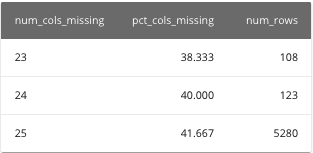

In [10]:
df.isnull().any(axis=1)

parcelid
10711855     True
10711877     True
10711888     True
10711910     True
10711923     True
             ... 
167686999    True
167687739    True
167687839    True
167688532    True
167689317    True
Length: 77380, dtype: bool

In [58]:
df.isna()

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,buildingclasstypeid.1,buildingclassdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,False,True,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,True,True,True,True
10711877,False,False,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,True,True,True,True
10711888,False,False,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,True,True,True,True
10711910,False,True,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,True,True,True,True
10711923,False,True,True,True,False,False,True,False,False,True,...,True,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167686999,False,True,True,True,False,False,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
167687739,False,True,True,True,False,False,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
167687839,False,True,True,True,False,False,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True


In [16]:
df.isna().sum(axis=1)

parcelid
10711855     36
10711877     33
10711888     35
10711910     36
10711923     36
             ..
167686999    54
167687739    53
167687839    54
167688532    41
167689317    53
Length: 77380, dtype: int64

In [5]:
col1 = pd.DataFrame(df.isna().sum(axis=1))

In [6]:
col1 = col1.rename(columns={0: "num_cols_missing"})

In [7]:
col2 = pd.DataFrame(((df.isna().sum(axis=1)) / len(df.columns))*100)

In [8]:
col2 = col2.rename(columns={0: "pct_cols_missing"})

In [24]:
len(df.columns)

74

In [36]:
col1.sort_values(by=['num_cols_missing'])

,num_cols_missing
parcelid,
14215623,25
14465914,25
14128839,26
14172935,26
14172985,26
...,...
17188862,53
167689317,53
14341728,54


In [9]:
co12 = pd.concat([col1, col2], axis=1)

In [10]:
co12 = co12.reset_index(drop=True)

In [11]:
co12

,num_cols_missing,pct_cols_missing
0,36,48.648649
1,33,44.594595
2,35,47.297297
3,36,48.648649
4,36,48.648649
...,...,...
77375,54,72.972973
77376,53,71.621622
77377,54,72.972973
77378,41,55.405405


In [12]:
co12 = co12.sort_values(by=['num_cols_missing'])

In [14]:
co12

,num_cols_missing,pct_cols_missing
58118,25,33.783784
63619,25,33.783784
56066,26,35.135135
57099,26,35.135135
57101,26,35.135135
...,...,...
74230,53,71.621622
77379,53,71.621622
60624,54,72.972973
77375,54,72.972973


## 

In [65]:
co12.num_cols_missing.value_counts()

39    13908
38    12748
36    10743
35     6943
42     5832
33     4827
41     4598
37     4536
43     3470
34     3304
40     3264
44     1913
45      285
31      230
46      230
32      178
50       78
51       50
29       43
28       39
30       36
47       29
49       28
48       23
27       21
26       11
52        5
54        3
53        3
25        2
Name: num_cols_missing, dtype: int64

In [22]:
co12 = co12.groupby(['num_cols_missing', 'pct_cols_missing']).count()

In [17]:
co12.num_cols_missing.value_counts(ascending=True)

25        2
53        3
54        3
52        5
26       11
27       21
48       23
49       28
47       29
30       36
28       39
29       43
51       50
50       78
32      178
46      230
31      230
45      285
44     1913
40     3264
34     3304
43     3470
37     4536
41     4598
33     4827
42     5832
35     6943
36    10743
38    12748
39    13908
Name: num_cols_missing, dtype: int64

In [23]:
co12

,
num_cols_missing,pct_cols_missing
25,33.783784
26,35.135135
27,36.486486
28,37.837838
29,39.189189
30,40.540541
31,41.891892
32,43.243243
33,44.594595


In [14]:
col3 = pd.DataFrame(co12.num_cols_missing.value_counts(ascending=True))

In [16]:
col3 = col3.rename(columns={'num_cols_missing': 'num_rows'})

In [17]:
col3

,num_rows
25,2
53,3
54,3
52,5
26,11
27,21
48,23
49,28
47,29
30,36


In [27]:
co12.reset_index(inplace=True)

In [28]:
col3.index

Int64Index([25, 53, 54, 52, 26, 27, 48, 49, 47, 30, 28, 29, 51, 50, 32, 46, 31,
            45, 44, 40, 34, 43, 37, 41, 33, 42, 35, 36, 38, 39],
           dtype='int64')

In [32]:
pd.merge(co12, col3, left_on='num_cols_missing', right_index=True, how='left')

,num_cols_missing,pct_cols_missing,num_rows
0,25,33.783784,2
1,26,35.135135,11
2,27,36.486486,21
3,28,37.837838,39
4,29,39.189189,43
5,30,40.540541,36
6,31,41.891892,230
7,32,43.243243,178
8,33,44.594595,4827
9,34,45.945946,3304


In [30]:
co12

,num_cols_missing,pct_cols_missing
0,25,33.783784
1,26,35.135135
2,27,36.486486
3,28,37.837838
4,29,39.189189
5,30,40.540541
6,31,41.891892
7,32,43.243243
8,33,44.594595
9,34,45.945946


In [6]:
col1 = pd.DataFrame(df.isna().sum(axis=1))
col1 = col1.rename(columns={0: "num_cols_missing"})

In [7]:
col1

,num_cols_missing
parcelid,
10711855,36
10711877,33
10711888,35
10711910,36
10711923,36
...,...
167686999,54
167687739,53
167687839,54


In [8]:
col2 = pd.DataFrame(((df.isna().sum(axis=1)) / len(df.columns))*100)
col2 = col2.rename(columns={0: "pct_cols_missing"})

In [9]:
col2

,pct_cols_missing
parcelid,
10711855,48.648649
10711877,44.594595
10711888,47.297297
10711910,48.648649
10711923,48.648649
...,...
167686999,72.972973
167687739,71.621622
167687839,72.972973


In [25]:
col12 = col1.merge(col2, left_index=True, right_index=True, how='left')

In [26]:
col12 = col12.sort_values(by=['num_cols_missing'])

In [28]:
col12.reset_index(drop=True, inplace=True)

In [29]:
col12.head()

,num_cols_missing,pct_cols_missing
0,25,33.783784
1,25,33.783784
2,26,35.135135
3,26,35.135135
4,26,35.135135


In [30]:
col3 = pd.DataFrame(col12.num_cols_missing.value_counts(ascending=True))
col3 = col3.rename(columns={'num_cols_missing': 'num_rows'})

In [31]:
col3

,num_rows
25,2
53,3
54,3
52,5
26,11
27,21
48,23
49,28
47,29
30,36


In [32]:
colsm = pd.merge(col12, col3, left_on='num_cols_missing', right_index=True, how='left')

In [33]:
colsm

,num_cols_missing,pct_cols_missing,num_rows
0,25,33.783784,2
1,25,33.783784,2
2,26,35.135135,11
3,26,35.135135,11
4,26,35.135135,11
...,...,...,...
77375,53,71.621622,3
77376,53,71.621622,3
77377,54,72.972973,3
77378,54,72.972973,3


### Test out function

In [5]:
missing_col = acq.missing_col_values(df)

In [6]:
missing_col

,num_cols_missing,pct_cols_missing,num_rows
0,25,33.783784,2
1,25,33.783784,2
2,26,35.135135,11
3,26,35.135135,11
4,26,35.135135,11
...,...,...,...
77375,53,71.621622,3
77376,53,71.621622,3
77377,54,72.972973,3
77378,54,72.972973,3


Matt's function: 

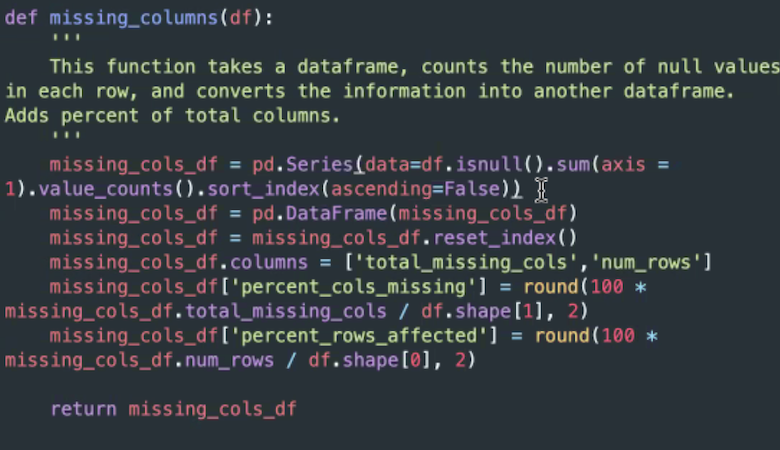

# Prepare
### 1. Remove any properties that are likely to be something other than single unit properties. 
(e.g. no duplexes, no land/lot, ...). 

There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. 

You might want to use 
- bedrooms,
- square feet, 
- unit type or the like to then identify those with unitcnt not defined.

In [6]:
df.shape

(77380, 74)

In [7]:
df.unitcnt.value_counts(dropna = False)

1.0      47292
NaN      26818
2.0       2018
4.0        723
3.0        525
45.0         1
6.0          1
237.0        1
42.0         1
Name: unitcnt, dtype: int64

In [8]:
# Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]

In [9]:
df.shape

(71193, 74)

### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

**1. The input**:
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

**2. The output**:
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- *hint*:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [5]:
df2 = acq.drop_based_on_pct(df, .6, .5)

In [7]:
df2.shape

(77380, 35)

### 3. Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [10]:
df = wz.drop_based_on_pct(df, .5, .7)

In [11]:
df.shape

(71193, 35)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71193 entries, 10711855 to 167688532
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71193 non-null  int64  
 1   bathroomcnt                   71193 non-null  float64
 2   bedroomcnt                    71193 non-null  float64
 3   buildingqualitytypeid         44726 non-null  float64
 4   calculatedbathnbr             71178 non-null  float64
 5   calculatedfinishedsquarefeet  71193 non-null  float64
 6   finishedsquarefeet12          71026 non-null  float64
 7   fips                          71193 non-null  float64
 8   fullbathcnt                   71178 non-null  float64
 9   heatingorsystemtypeid         46292 non-null  float64
 10  latitude                      71193 non-null  float64
 11  longitude                     71193 non-null  float64
 12  lotsizesquarefeet             63173 non-null  flo

In [14]:
df.isnull().sum()

id                                  0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26467
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              167
fips                                0
fullbathcnt                        15
heatingorsystemtypeid           24901
latitude                            0
longitude                           0
lotsizesquarefeet                8020
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              26175
rawcensustractandblock              0
regionidcity                     1321
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26149
yearbuilt                          35
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue

In [15]:
# use your judgement to remove certain columns which you don't need

cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc']

In [16]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [17]:
# use the function defined above to remove the columns not needed:

df = remove_columns(df, cols_to_remove)

In [18]:
# take a look at null counts again

df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26467
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8020
rawcensustractandblock              0
regionidcity                     1321
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26149
yearbuilt                          35
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
zestimateerror                      0
transactiondate                     0
heatingorsystemtypeid.1         24901
heatingorsystemdesc             24901
propertylandusetypeid.1             0
dtype: int64

In [19]:
# let's look at heatingorsystemdesc value counts

df.heatingorsystemdesc.value_counts(dropna = False)

Central       31278
NaN           24901
Floor/Wall    13193
Yes             846
Forced air      775
Solar           101
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [20]:
# I assume that since this is Southern CA, 'null' probably means 'None' for heating system

df.heatingorsystemdesc.fillna('None', inplace = True)

In [21]:
df.heatingorsystemdesc.value_counts(dropna = False)

Central       31278
None          24960
Floor/Wall    13193
Yes             846
Forced air      775
Solar           101
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [22]:
df.unitcnt.value_counts(dropna = False)

1.0    45044
NaN    26149
Name: unitcnt, dtype: int64

In [23]:
# For unit counts, I will fill 'NaN' with unit count of 1

df.unitcnt.fillna(1, inplace = True)

In [24]:
df.unitcnt.value_counts()

1.0    71193
Name: unitcnt, dtype: int64

In [25]:
# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbersw = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26467
8.0     13367
6.0     12637
4.0      8206
7.0      5496
9.0      2109
5.0      1495
11.0      844
10.0      301
3.0       146
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [26]:
df.buildingqualitytypeid.value_counts()

8.0     13367
6.0     12637
4.0      8206
7.0      5496
9.0      2109
5.0      1495
11.0      844
10.0      301
3.0       146
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

<AxesSubplot:>

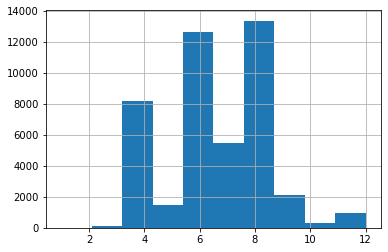

In [27]:
# look at distrubition of buildingqualitytypeid

df.buildingqualitytypeid.hist()

In [28]:
# what is the median value of buildingqualitytypeid?

df.buildingqualitytypeid.median()

6.0

In [29]:
# fill missing values for buildingqualitytypeid with median value
df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [31]:
df.buildingqualitytypeid.value_counts(dropna = False)

6.0     39104
8.0     13367
4.0      8206
7.0      5496
9.0      2109
5.0      1495
11.0      844
10.0      301
3.0       146
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

<AxesSubplot:>

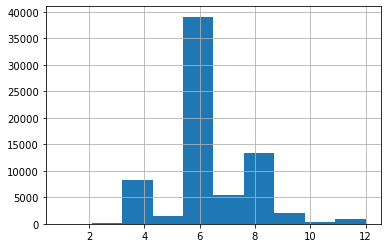

In [32]:
df.buildingqualitytypeid.hist()

In [30]:
df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8020
rawcensustractandblock              0
regionidcity                     1321
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                             0
yearbuilt                          35
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
zestimateerror                      0
transactiondate                     0
heatingorsystemtypeid.1         24901
heatingorsystemdesc                 0
propertylandusetypeid.1             0
dtype: int64

<AxesSubplot:>

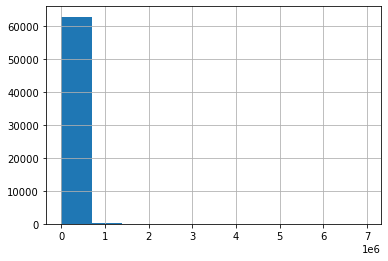

In [33]:
# look at lot-size distribution
df.lotsizesquarefeet.hist()

In [34]:
# what is the median lot size?

df.lotsizesquarefeet.median()

7314.0

In [35]:

# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7314, inplace = True)

<AxesSubplot:>

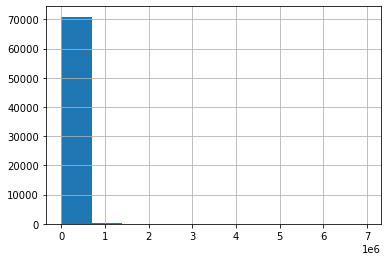

In [36]:
df.lotsizesquarefeet.hist()

In [37]:
df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
rawcensustractandblock              0
regionidcity                     1321
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                             0
yearbuilt                          35
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
zestimateerror                      0
transactiondate                     0
heatingorsystemtypeid.1         24901
heatingorsystemdesc                 0
propertylandusetypeid.1             0
dtype: int64

In [38]:
df = remove_columns(df, ['heatingorsystemtypeid.1'])

In [39]:
df.isnull().sum()

bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1321
regionidcounty                     0
regionidzip                       40
roomcnt                            0
unitcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        73
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
zestimateerror                     0
transactiondate                    0
heatingorsystemdesc                0
propertylandusetypeid.1            0
dtype: int64

In [40]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [41]:
# How many rows and columns are left?

df.shape

(69760, 24)

In [42]:
df.head(2)

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,zestimateerror,transactiondate,heatingorsystemdesc,propertylandusetypeid.1
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,12447.0,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central,261
10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,12447.0,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Central,261


### Check for outliers in select columns

<AxesSubplot:ylabel='taxvaluedollarcnt'>

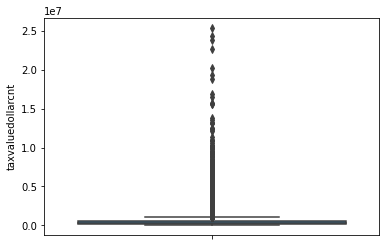

In [43]:
sns.boxplot(y = 'taxvaluedollarcnt', data = df)

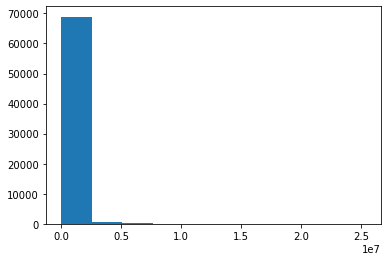

In [44]:
#Histograms for taxvalue of properties

plt.hist(df.taxvaluedollarcnt);

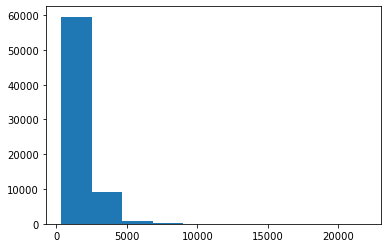

In [45]:
#Histograms for covered sq ft of properties

plt.hist(df.calculatedfinishedsquarefeet);

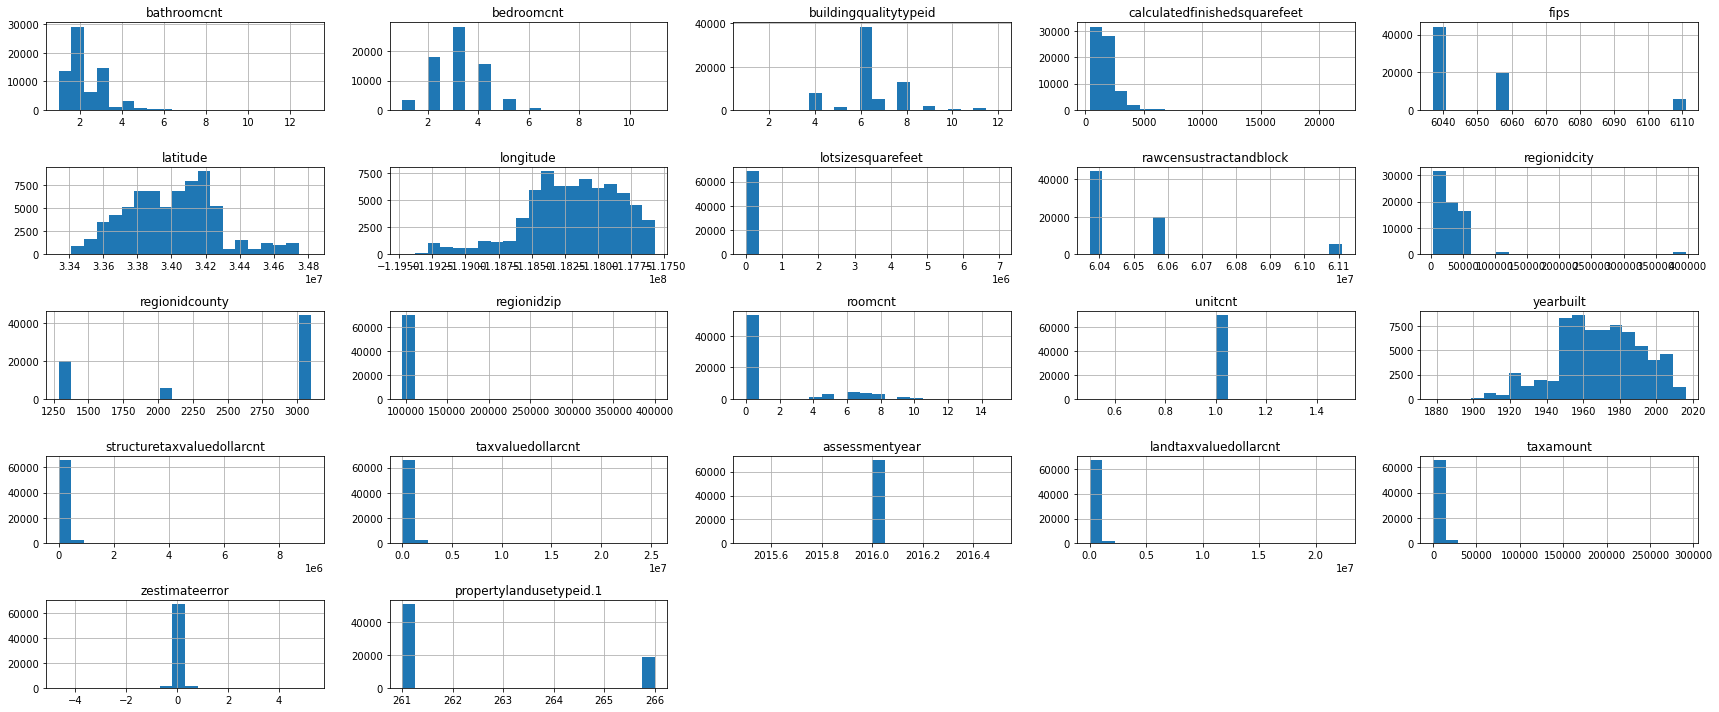

In [46]:
# look at distributions for all columns

df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [47]:
# Remove properties valued more than 5 million dollars

df = df[df.taxvaluedollarcnt < 5_000_000]
df.shape

(69571, 24)

In [48]:
# Remove properties valued more than 8000 square feet

df[df.calculatedfinishedsquarefeet < 8000]
df.shape

(69571, 24)

In [2]:
df = pd.read_csv('zillow17.csv')
df = df.set_index("parcelid")
df.shape

(77380, 74)

In [3]:
single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
df.shape

(71693, 74)

In [4]:
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]
df.shape

(71193, 74)

In [5]:
df = wz.drop_based_on_pct(df, .5, .7)
df.shape

(71193, 35)

In [6]:
df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))
df.shape

(71193, 36)

In [7]:
df = wz.remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       , 'heatingorsystemtypeid.1', 'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc'])
df.shape

(71193, 25)

In [8]:
df.unitcnt.fillna(1, inplace = True)
df.shape

(71193, 25)

In [9]:
df.heatingorsystemdesc.fillna('None', inplace = True)
df.shape

(71193, 25)

In [10]:
df.lotsizesquarefeet.fillna(7314, inplace = True)
df.buildingqualitytypeid.fillna(6.0, inplace = True)
df.shape

(71193, 25)

In [11]:
df = df[df.taxvaluedollarcnt < 5_000_000]
df[df.calculatedfinishedsquarefeet < 8000]
df.shape

(70994, 25)

In [12]:
df.isnull().sum()

bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1315
regionidcounty                     0
regionidzip                       40
roomcnt                            0
unitcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        68
taxvaluedollarcnt                  0
assessmentyear                     0
landtaxvaluedollarcnt              0
taxamount                          5
zestimateerror                     0
transactiondate                    0
heatingorsystemdesc                0
propertylandusetypeid.1            0
county                             0
dtype: int64

In [13]:
df = df.dropna()
df.shape

(69571, 25)

In [4]:
df.shape

(69571, 25)

In [23]:
cols = ['fips', 'buildingqualitytypeid', 'bedroomcnt', 'roomcnt', 'yearbuilt', 'assessmentyear', 'regionidcounty', 'regionidzip', 'unitcnt']

In [15]:
df = df.astype({[cols]: "int64"})

TypeError: unhashable type: 'list'

In [24]:
for col in cols:
    df[col] = df[col].astype('int')


In [2]:
df = wz.wrangle_zillow()

In [3]:
df.head(2)

,bathrooms,bedrooms,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,home_value,assessmentyear,landtaxvaluedollarcnt,taxamount,zestimateerror,transactiondate,heatingorsystemdesc,propertylandusetypeid,county,home_age
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3,8,2107.0,6037,34222559.0,-118617387.0,9158.0,6.037113e+07,12447.0,...,624139.0,2016,374484.0,7659.36,-0.007357,2017-07-07,Central,261,Los_Angeles,49
10711877,2.0,4,8,1882.0,6037,34220261.0,-118616409.0,9035.0,6.037113e+07,12447.0,...,660000.0,2016,407000.0,8123.91,0.021066,2017-08-29,Central,261,Los_Angeles,49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69571 entries, 10711855 to 162960814
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathrooms                     69571 non-null  float64
 1   bedrooms                      69571 non-null  int64  
 2   buildingqualitytypeid         69571 non-null  int64  
 3   calculatedfinishedsquarefeet  69571 non-null  float64
 4   fips                          69571 non-null  int64  
 5   latitude                      69571 non-null  float64
 6   longitude                     69571 non-null  float64
 7   lotsizesquarefeet             69571 non-null  float64
 8   rawcensustractandblock        69571 non-null  float64
 9   regionidcity                  69571 non-null  float64
 10  regionidcounty                69571 non-null  int64  
 11  regionidzip                   69571 non-null  int64  
 12  roomcnt                       69571 non-null  int

In [8]:
df.county.value_counts()

Los_Angeles    44060
Orange         19813
Ventura         5698
Name: county, dtype: int64

In [10]:
county_dummies = pd.get_dummies(df.county, prefix='county', drop_first=True)

In [13]:
county_dummies.head(2)

,county_Orange,county_Ventura
parcelid,,
10711855,0,0
10711877,0,0


In [14]:
df['zerror_qrtls'] = pd.qcut(df.zestimateerror, q=4, labels=['q1', 'q2', 'q3', 'q4'])

In [15]:
df.head()

,bathrooms,bedrooms,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,assessmentyear,landtaxvaluedollarcnt,taxamount,zestimateerror,transactiondate,heatingorsystemdesc,propertylandusetypeid,county,home_age,zerror_qrtls
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3,8,2107.0,6037,34222559.0,-118617387.0,9158.0,6.037113e+07,12447.0,...,2016,374484.0,7659.36,-0.007357,2017-07-07,Central,261,Los_Angeles,49,q2
10711877,2.0,4,8,1882.0,6037,34220261.0,-118616409.0,9035.0,6.037113e+07,12447.0,...,2016,407000.0,8123.91,0.021066,2017-08-29,Central,261,Los_Angeles,49,q3
10711888,2.0,4,8,1882.0,6037,34222491.0,-118616854.0,9800.0,6.037113e+07,12447.0,...,2016,285332.0,6673.24,0.077174,2017-04-04,Central,261,Los_Angeles,49,q4
10711910,2.0,3,8,1477.0,6037,34221864.0,-118615739.0,11285.0,6.037113e+07,12447.0,...,2016,20063.0,1116.46,-0.041238,2017-03-17,Central,261,Los_Angeles,61,q1
10711923,2.0,4,8,1918.0,6037,34220619.0,-118615253.0,11239.0,6.037113e+07,12447.0,...,2016,247590.0,5239.85,-0.009496,2017-03-24,Central,261,Los_Angeles,61,q2


# Mall Customers
**notebook**

1. Acquire data from mall_customers.customers in mysql database.
2. Summarize data (include distributions and descriptive statistics).
3. Detect outliers using IQR.
4. Split data (train, validate, and test split).
5. Encode categorical columns using a one hot encoder (pd.get_dummies).
6. Handles missing values.
7. Scaling

### wrangle_mall.py

1. Acquire data from mall_customers.customers in mysql database.
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
4. Missing values
5. Scaling